## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## Chargement du dataset

In [2]:
df = pd.read_csv('F1_2122.csv')
df.dropna(inplace=True)

In [3]:
#df = df.drop(['Div', 'Date', 'Time', 'FTHG', 'FTAG', 'HTHG', 'HTAG', 'HTR', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR'], axis=1)
df = df[['HomeTeam','AwayTeam','FTR','B365H','B365D','B365A']]
df

,HomeTeam,AwayTeam,FTR,B365H,B365D,B365A
0,Monaco,Nantes,D,1.44,4.33,7.00
1,Lyon,Brest,D,1.33,5.00,8.50
2,Troyes,Paris SG,A,11.00,6.00,1.25
3,Rennes,Lens,D,2.00,3.40,3.75
4,Bordeaux,Clermont,A,2.00,3.40,3.75
...,...,...,...,...,...,...
375,Lorient,Troyes,D,2.15,3.50,3.40
376,Marseille,Strasbourg,H,2.05,3.60,3.60
377,Nantes,St Etienne,D,2.60,3.50,2.62
378,Paris SG,Metz,H,1.20,8.50,10.00


In [4]:
df['HomeTeam'].unique()

array(['Monaco', 'Lyon', 'Troyes', 'Rennes', 'Bordeaux', 'Nice',
       'St Etienne', 'Strasbourg', 'Metz', 'Montpellier', 'Lorient',
       'Lille', 'Paris SG', 'Angers', 'Brest', 'Clermont', 'Nantes',
       'Reims', 'Lens', 'Marseille'], dtype=object)

Salaire brut annuel total année en cours (Capology)

Moyenne spectateurs année en cours 2122 (Transfermarkt)

Avantage Domicile % saison 2122 (FootyStats)

In [5]:
team_params = {
    'Monaco': [53770000, 5908, 19],
    'Lyon': [68560000, 32330, 14],
    'Troyes': [15670000, 9527, 16],
    'Rennes': [26440000, 25501, 29],
    'Bordeaux': [27670000, 22141, 12],
    'Nice': [32580000, 16077, -7],
    'St Etienne': [21550000, 21806, 8],
    'Strasbourg': [14510000, 23551, 18],
    'Metz': [11290000, 16174, 16],
    'Montpellier': [12570000, 10763, 13],
    'Lorient': [9010000, 12738, 22],
    'Lille': [28100000, 34556, 4],
    'Paris SG': [421110000, 41589, 22],
    'Angers': [12330000, 7758, 11],
    'Brest': [10650000, 11710, 6],
    'Clermont': [4830000, 10569, 10],
    'Nantes': [18990000, 20485, 19],
    'Reims': [12010000, 11613, 7],
    'Lens': [10230000, 28950, 15],
    'Marseille': [55910000, 51544, -6]
}


In [6]:
HomeBudget = []
AwayBudget = []
HomeAttendance = []
HomeAdvantage = []

for index, row in df.iterrows():
    HomeBudget.append(team_params[row['HomeTeam']][0])
    AwayBudget.append(team_params[row['AwayTeam']][0])
    HomeAttendance.append(team_params[row['HomeTeam']][1])
    HomeAdvantage.append(team_params[row['HomeTeam']][2])

In [7]:
df['HomeBudget'] = HomeBudget
df['AwayBudget'] = AwayBudget
df['HomeAttendance'] = HomeAttendance
df['HomeAdvantage'] = HomeAdvantage

In [8]:
df_equipe = df[['HomeTeam', 'AwayTeam', 'FTR']]
df = df.drop(['HomeTeam', 'AwayTeam', 'FTR'], axis=1)
df

,B365H,B365D,B365A,HomeBudget,AwayBudget,HomeAttendance,HomeAdvantage
0,1.44,4.33,7.00,53770000,18990000,5908,19
1,1.33,5.00,8.50,68560000,10650000,32330,14
2,11.00,6.00,1.25,15670000,421110000,9527,16
3,2.00,3.40,3.75,26440000,10230000,25501,29
4,2.00,3.40,3.75,27670000,4830000,22141,12
...,...,...,...,...,...,...,...
375,2.15,3.50,3.40,9010000,15670000,12738,22
376,2.05,3.60,3.60,55910000,14510000,51544,-6
377,2.60,3.50,2.62,18990000,21550000,20485,19
378,1.20,8.50,10.00,421110000,11290000,41589,22


## Classification

Arbre Décisionel

In [9]:
X = df
y = df_equipe['FTR']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

clf_DT = DecisionTreeClassifier()
clf_DT.fit(X_train, y_train)

y_pred_DT = clf_DT.predict(X_test)

accuracy_DT = clf_DT.score(X_test, y_test)

KNN

In [10]:
X = df
y = df_equipe['FTR']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

clf_KNN = KNeighborsClassifier(n_neighbors=8)
clf_KNN.fit(X_train, y_train)

y_pred_KNN = clf_KNN.predict(X_test)

accuracy_KNN = clf_KNN.score(X_test, y_test)

Random Forest

In [11]:
X = df
y = df_equipe['FTR']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

clf_RF = RandomForestClassifier(max_depth=2, random_state=0)
clf_RF.fit(X_train, y_train)

y_pred_RF = clf_RF.predict(X_test)

accuracy_RF = clf_RF.score(X_test, y_test)

ConvNet

In [12]:
import numpy as np
from tensorflow import keras
from tensorflow.python.keras import layers

In [15]:
#X = df
#y = df_equipe['FTR']

X = df.to_numpy()
X = X.reshape((X.shape[0], X.shape[1], 1, 1))
y = df_equipe['FTR'].to_numpy()
input_shape = X.shape[1:]

num_classes = 3
#input_shape = (372, 7, 1)

model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

batch_size = 128
epochs = 100

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(X, y, batch_size=batch_size, epochs=epochs, validation_split=0.2)

score = model.evaluate(X, y, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

ValueError: Exception encountered when calling layer "module_wrapper_3" (type ModuleWrapper).

Negative dimension size caused by subtracting 3 from 1 for '{{node module_wrapper_3/conv2d_2/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, module_wrapper_3/conv2d_2/Conv2D/ReadVariableOp)' with input shapes: [?,7,1,1], [3,3,1,32].

Call arguments received by layer "module_wrapper_3" (type ModuleWrapper):
  • args=('tf.Tensor(shape=(None, 7, 1, 1), dtype=float32)',)
  • kwargs={'training': 'None'}

## Résultats

In [40]:
print("Précision du DecisionTreeClassifier:", accuracy_DT)
print("Précision du KNeighborsClassifier:", accuracy_KNN)
print("Précision du RandomForestClassifier:", accuracy_RF)

Précision du DecisionTreeClassifier: 0.3466666666666667
Précision du KNeighborsClassifier: 0.38666666666666666
Précision du RandomForestClassifier: 0.49333333333333335


In [41]:
df_final = pd.DataFrame()
df_final['Résultat'] = y_test
df_final['Prédiction'] = y_pred_RF
df_final = pd.merge(df_equipe[['HomeTeam', 'AwayTeam']].reset_index(), df_final.reset_index(), on='index')
df_final = df_final.drop(['index'], axis=1)
df_final

,HomeTeam,AwayTeam,Résultat,Prédiction
0,Bordeaux,Clermont,A,H
1,Nice,Reims,D,H
2,St Etienne,Lorient,D,H
3,Lille,Nice,A,H
4,Angers,Lyon,H,A
...,...,...,...,...
70,Bordeaux,Lorient,D,H
71,Rennes,Marseille,H,H
72,St Etienne,Reims,A,H
73,Brest,Bordeaux,A,H


## Statistiques

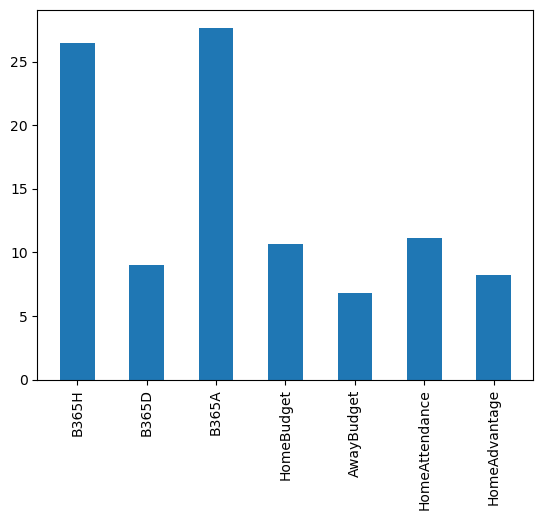

In [42]:
nb_deb = 0
nb_fin = 100

plt.bar(x=df.columns[nb_deb:nb_fin],height=clf_RF.feature_importances_[nb_deb:nb_fin]*100,width=0.5,bottom=None, align='center')
plt.xticks(range(len(df.columns[nb_deb:nb_fin])), df.columns[nb_deb:nb_fin], rotation='vertical')
plt.show()

In [43]:
for i in range(len(clf_RF.feature_importances_)):
    if clf_RF.feature_importances_[i] == 0:
        print(df.columns[i])